In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
x = df['Sorting Time']
y = df['Delivery Time']

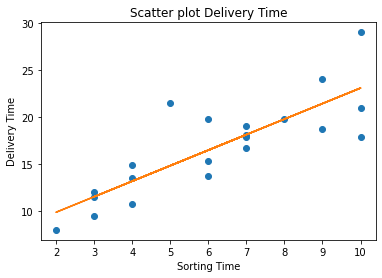

In [5]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

As displayed in the scatter plot, the data does contains some outliers, but there is potive correlation between delivery time and sorting Time

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

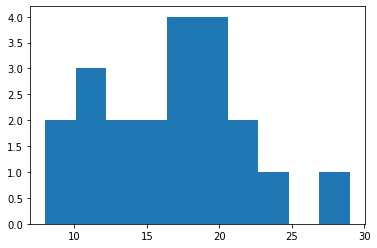

In [7]:
plt.hist(df["Delivery Time"])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

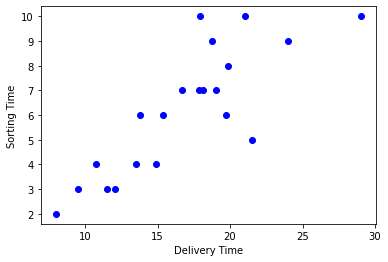

In [8]:
#Scatterplot 
plt.plot(df["Delivery Time"],df["Sorting Time"], 'bo')
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.plot

{'whiskers': [<matplotlib.lines.Line2D at 0x26281dede50>,
 'caps': [<matplotlib.lines.Line2D at 0x26281dfe3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26281dedb80>],
 'medians': [<matplotlib.lines.Line2D at 0x26281dfe790>],
 'fliers': [<matplotlib.lines.Line2D at 0x26281dfea60>],
 'means': []}

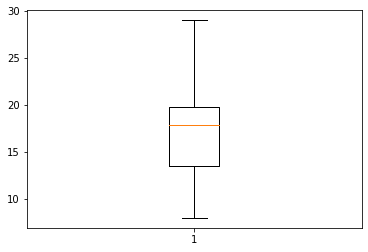

In [9]:
#discribe 
plt.boxplot(df["Delivery Time"])

### __Correlation Analysis__

In [10]:
corr = np.corrcoef(x, y)

In [11]:
corr 

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

##   Regression Model

###   No transformation

In [12]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    6.12e-15
Time:                        15:17:49   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#RMSE values root mean squear errore 
pred = model.predict(y)
model_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model_RMSE 

27.401391099283416

###  Log Transformation of X

In [15]:
x_log = np.log(df['Sorting Time'])

In [16]:
model2 = sm.OLS(y, x_log).fit()
predictions = model2.predict(x_log)

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    1.48e-17
Time:                        15:17:49   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#RMSE values root mean squear errore 
pred = model2.predict(y)
model2_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model2_RMSE 

151.7878907209379

### Log Transformation of Y

In [19]:
y_log = np.log(df['Delivery Time'])

In [20]:
model3 = sm.OLS(y_log, x).fit()
predictions = model3.predict(x)

In [21]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    3.00e-12
Time:                        15:17:49   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#RMSE values root mean squear errore 
pred = model3.predict(y)
model3_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model3_RMSE 

10.489361867673892

###  Log Transformation of X & Y

In [23]:
model4 = sm.OLS(y_log, x_log).fit()
predictions = model4.predict(x_log)

In [24]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    5.72e-17
Time:                        15:17:49   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#RMSE values root mean squear errore 
pred = model4.predict(y)
model4_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model4_RMSE 

9.445859450188115

###  Sq Root Transformation of X

In [26]:
x_sqrt = np.sqrt(df['Sorting Time'])

In [27]:
model5 = sm.OLS(y, x_sqrt).fit()
predictions = model5.predict(x_sqrt)

In [28]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    1.88e-17
Time:                        15:17:49   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#RMSE values root mean squear errore 
pred = model5.predict(y)
model5_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model5_RMSE 

104.10236732586657

### Square Root Transformation of Y

In [30]:
y_sqrt = np.sqrt(df['Delivery Time'])

In [31]:
model6 = sm.OLS(y_sqrt, x).fit()
predictions = model6.predict(x)

In [32]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    5.09e-13
Time:                        15:17:49   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#RMSE values root mean squear errore 
pred = model6.predict(y)
model6_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model6_RMSE 

7.132729515002709

### Square Root Transformation of X & Y

In [34]:
model7 = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model7.predict(x_sqrt)

In [35]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    2.10e-20
Time:                        15:17:49   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#RMSE values root mean squear errore 
pred = model7.predict(y)
model7_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model7_RMSE 

11.140078650080568

## __4 - Output Interpretation__ 

In [37]:
datam ={"Model":pd.Series(["No transformation","Log Transformation of X","Log Transformation of Y","Log Transformation of X & Y",
                          "Sq Root Transformation of X","Square Root Transformation of Y","Square Root Transformation of X & Y"]),
       "RMSE_Values":pd.Series([model_RMSE,model2_RMSE,model3_RMSE,model4_RMSE,model5_RMSE,model6_RMSE,model7_RMSE]),
       "RSquear": pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared]),
       "p value": pd.Series([model.pvalues,model2.pvalues,model3.pvalues,model4.pvalues,model5.pvalues,model6.pvalues,model7.pvalues])}
table = pd.DataFrame(datam)
table

,Model,RMSE_Values,RSquear,p value
0,No transformation,27.401391,0.955005,Sorting Time 6.118908e-15 dtype: float64
1,Log Transformation of X,151.787891,0.975338,Sorting Time 1.483157e-17 dtype: float64
2,Log Transformation of Y,10.489362,0.916549,Sorting Time 3.002317e-12 dtype: float64
3,Log Transformation of X & Y,9.445859,0.971780,Sorting Time 5.717261e-17 dtype: float64
4,Sq Root Transformation of X,104.102367,0.974747,Sorting Time 1.879763e-17 dtype: float64
5,Square Root Transformation of Y,7.132730,0.930066,Sorting Time 5.094806e-13 dtype: float64
6,Square Root Transformation of X & Y,11.140079,0.987195,Sorting Time 2.100766e-20 dtype: float64


In [38]:
model.pvalues

Sorting Time    6.118908e-15
dtype: float64

# Square Root Transformation of X & Y is best model

In [39]:
model7_ress= model7.resid_pearson

In [40]:
model7_ress

array([-1.24599996,  0.84506802,  0.91733801, -0.02121571,  0.44315362,
       -0.19009672,  0.06211814,  0.52186399, -1.98627542, -1.21844   ,
       -0.36876772,  0.01265432, -0.51619934,  1.17210642,  1.3347187 ,
        1.23069041, -0.63166581, -0.15532045,  1.0823569 , -0.22482819,
        2.05793298])

In [41]:
import seaborn as sns

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

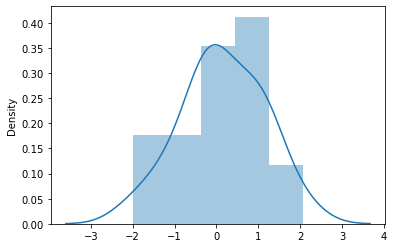

In [43]:
sns.distplot(model7_ress)